# 1. Introducció

*League of Legends* (LoL) és un dels videojocs d’estratègia en equip més populars del món.  
Cada partida enfronta **dos equips de cinc jugadors** que competeixen per destruir la base rival.  
Abans de començar, cada jugador —anomenat *invocador*— escull un **campió** d’entre més de **140 personatges únics**, cadascun amb habilitats i rols diferents (guerrer, mag, suport, assassí...).

Durant la partida, els equips intenten aconseguir **objectius estratègics** (com ara torres, dracs o barons) que donen grans avantatges.  
Analitzar aquesta informació —els objectius assolits, les baixes, l’or guanyat o la durada de la partida— ens permet extreure patrons que ajuden a entendre **per què un equip guanya o perd**.

En aquest projecte treballarem amb dades extretes de **Kaggle**, provinents del conjunt *League of Legends Ranked Games*.  
Aquest conjunt conté desenes de milers de partides classificades i registra, per a cadascuna, **estadístiques detallades dels equips i dels jugadors**.

L’objectiu és construir un **model predictiu capaç d’estimar quin equip guanyarà** una partida a partir de les seves estadístiques i de la composició dels campions escollits.  
A més, aprofitarem aquesta anàlisi per comprendre **quins factors tenen més influència en la victòria** dins d’un joc tan complex i dinàmic com *League of Legends*.


# 2. Introducció al joc

Per entendre els passos que s’han seguit durant el desenvolupament del model predictiu, és important conèixer els **elements principals del joc** i com aquests estan representats a les dades.

*League of Legends* és un joc d’estratègia en equip on dos equips de cinc jugadors competeixen per destruir la base rival.  
Cada jugador controla un **campió**, un personatge amb habilitats úniques i un **rol específic** dins de l’equip.

### Els campions
Els **campions** són els protagonistes del joc.  
N’existeixen més de 140, cadascun amb un conjunt d’habilitats diferents (atac, defensa, suport, control, etc.).  
Abans de cada partida, cada jugador escull un campió i aquest passa a ser la seva peça principal durant tot el joc.

Els campions no són tots iguals ni mantenen sempre el mateix rendiment.  
*League of Legends* és un joc que s’actualitza de manera constant mitjançant **versions o “parches”**, que introdueixen canvis d’equilibri (anomenats *buffs* o *nerfs*).  
Això significa que un campió pot ser molt fort en una versió concreta i menys eficaç en la següent.  
A partir d’aquestes variacions, la comunitat i els analistes acostumen a calcular els **winrates** o percentatges de victòria, que reflecteixen com de sovint un campió guanya una partida.

Aquest projecte utilitza aquests conceptes de forma quantitativa: s’ha calculat per a cada campió un valor de **força mitjana històrica** (*winrate estimat*) que s’incorpora al model mitjançant tècniques d’“encoding”.  
D’aquesta manera, el model pot tenir en compte la qualitat de la composició d’equip més enllà de les estadístiques pures de la partida.

### Objectius del joc

Tot i que els campions són la clau de l’estratègia, l’objectiu final continua sent destruir el **Nexe (Nexus)** de l’equip rival. Per aconseguir-ho, cal avançar per les tres línies (*lanes*) i assolir una sèrie d’objectius:

#### Nexus
És l’estructura central i el principal objectiu del joc. Quan un equip destrueix el Nexe enemic, guanya la partida.  
La variable **`winner`** del nostre dataset indica quin equip ho ha aconseguit.

#### Inhibidors
Estructures situades a la base que, en ser destruïdes, fan que els minions de l’equip rival es tornin molt més forts.  
Estan representats per les columnes **`*_firstinhib`** i **`*_inhibkills`**.

#### Torres
Estructures defensives que protegeixen les línies i la base.  
Les columnes **`*_firsttower`** i **`*_towerkills`** reflecteixen quin equip ha destruït la primera torre i el nombre total de torres destruïdes.

#### Herald del Rift
Monstre èpic que apareix al principi de la partida.  
L’equip que el derrota obté un objecte que pot utilitzar per fer-lo aparèixer i ajudar a destruir torres enemigues.  
Apareix a les columnes **`*_firstharry`** i **`*_harrykills`**.

#### Drac
Monstre èpic que apareix periòdicament i atorga millores permanents a les estadístiques de l’equip que el derrota.  
Les columnes **`*_firstdragon`** i **`*_dragonkills`** recullen aquesta informació.

#### Baró Nashor
És el monstre més important i ofereix un gran avantatge a l’equip que el derrota, augmentant el poder dels jugadors i dels seus minions.  
Es troba representat per **`*_firstbaron`** i **`*_baronkills`**.


En resum, el joc combina dos tipus de factors:  
- **Estratègics**, com els objectius aconseguits durant la partida (torres, dracs, barons...).  
- **Tàctics**, com la composició de campions i el seu rendiment històric.  

El nostre model de predicció utilitza tots aquests elements per intentar identificar quins patrons augmenten la probabilitat de victòria d’un equip.


# Predicció de l’equip guanyador a *League of Legends*

Aquest projecte utilitza un conjunt de **7 datasets** del joc *League of Legends (LoL)* amb l’objectiu de **predir quin equip guanyarà una partida** a partir de les seves estadístiques i la composició dels campions.

### Datasets originals i finalitat

1. **matches.csv**  
   Conté informació general de cada partida (durada, versió, temporada...).

2. **teamstats.csv**  
   Estadístiques a nivell d’equip: nombre de torres, dracs, barons, inhibidors, etc.

3. **teambans.csv**  
   Llista dels campions que cada equip ha prohibit (*bans*).  
   *(No s’utilitza al model principal, però podria servir per a anàlisis futures).*

4. **participants.csv**  
   Detalla els jugadors i els campions utilitzats a cada partida (10 per partida).

5. **stats1.csv / stats2.csv**  
   Contenen estadístiques individuals de cada jugador (kills, morts, or guanyat, minions, etc.).  
   Es combinen per tenir tots els jugadors.

6. **champs.csv**  
   Llista de campions disponibles (nom i identificador).


### Com s’han combinat

1. S’han unit `matches`, `teamstats`, `stats1` i `stats2` per crear un dataset amb estadístiques **per partida i equip** (`lol_clean.csv`).

2. Després s’ha afegit informació de **composició de campions** a través de `participants` i `champs`, aplicant un **Target Encoding** que resumeix la força mitjana dels campions de cada equip sense generar milers de columnes.

3. El resultat final és `lol_final.csv`, amb una fila per partida i columnes per a cada equip (`blue_*` i `red_*`), més la variable objectiu `winner`.

### Objectiu
Predir la variable:
> `winner` → 1 si guanya l’equip blau, 0 si guanya l’equip vermell

a partir de:
- Estadístiques de la partida (kills, or, objectius...)  
- Característiques derivades de la composició (mitjana i dispersió del rendiment dels campions)



## Com s’ha generat el dataset final `lol_final.csv`

Per arribar al dataset final amb què treballarem, hem combinat i processat **tots els fitxers originals** del conjunt de dades de *League of Legends*.

### Integració de dades bàsiques
Primer hem combinat els arxius principals (`matches`, `teamstats`, `stats1`, `stats2`, `participants`, `champs`) per construir un dataset amb **una fila per partida**, on cada equip (blau i vermell) té les seves estadístiques.

- S’han unit les dades dels **jugadors** amb les seves **estadístiques individuals** (`stats1` i `stats2`), i posteriorment s’han agregat a nivell d’equip (suma de kills, or, assistències, etc.).
- S’ha inferit l’equip de cada jugador (`teamid=100` per al blau, `200` per al vermell) a partir del número de jugador.
- S’han afegit els **objectius d’equip** (torres, dracs, barons...) des de `teamstats` i la **informació de la partida** (`durada`, `versió`, `temporada`) des de `matches`.
- Finalment, s’han combinat les estadístiques de l’equip blau i de l’equip vermell en una sola fila i s’ha creat la variable **`winner`**, que val 1 si guanya l’equip blau i 0 si guanya el vermell.

El resultat d’aquest procés és el fitxer `lol_clean.csv`, amb totes les estadístiques bàsiques de cada partida.

### Afegir informació sobre la composició d’equips
A continuació, s’ha enriquit el dataset amb informació sobre **els campions seleccionats** a cada partida, utilitzant `participants.csv`.

Per no crear milers de columnes (una per campió), s’ha aplicat un mètode de **Target Encoding**:
- S’ha calculat el **winrate mitjà de cada campió** (probabilitat de victòria històrica).
- Per a cada equip s’ha agregat el rendiment mitjà, màxim, mínim i desviació estàndard dels cinc campions triats.
- S’han afegit també les diferències entre els valors mitjans del blau i del vermell.

Això genera noves variables com `blue_te_mean`, `red_te_max` o `te_mean_diff`, que representen la **força estimada de la composició de cada equip**.

El resultat final és el fitxer **`lol_final.csv`**, que conté:
- Les estadístiques generals de partida (`lol_clean.csv`)
- + Les característiques de composició d’equip (Target Encoding)
- + La variable objectiu `winner`

Aquest fitxer és el que utilitzarem per fer l’anàlisi exploratòria i entrenar els models de predicció.


# 3. Dependències

Abans de començar l’anàlisi de dades, incorporem les llibreries principals que utilitzarem en el projecte. Cada una d’elles té un paper específic en el processament, visualització i modelatge de les dades.

**Pandas**: operador principal per a la càrrega, manipulació i transformació de dades en taules.  
**NumPy**: suport per a operacions numèriques i vectors eficients.  
**Seaborn i Matplotlib**: creació de gràfics i visualitzacions estadístiques.  
**Scikit-learn**: divisió en conjunts de Train/Test, mètriques i models de classificació.  
**XGBoost**: model de gradient boosting d’alt rendiment.  

A continuació, importem totes les dependències necessàries per treballar amb el dataset `lol_final.csv`.

In [57]:
import pandas as pd
import numpy as np

# Visualització
import matplotlib.pyplot as plt
import seaborn as sns

# Modelatge i mètriques
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
#from xgboost import XGBClassifier

# Altres
import warnings
warnings.filterwarnings("ignore")

# 4. Exploració de les dades

Abans de començar l’anàlisi detallada i el desenvolupament del model predictiu, és important **familiaritzar-nos amb el conjunt de dades** amb què treballarem.  
Conèixer l’estructura, el nombre de files, les columnes disponibles i el tipus d’informació que tenim ens permet prendre millors decisions durant tot el procés.

En aquest projecte, utilitzarem el fitxer **`lol_final.csv`**, que és el resultat de combinar i preparar més de sis fitxers originals del conjunt de dades de League of Legends.  
Aquest fitxer final conté, per a cada partida, informació agregada sobre:

- estadístiques dels equips  
- objectius aconseguits  
- rendiment econòmic i de combat  
- composició dels campions mitjançant *target encoding*  
- i finalment, la variable objectiu `winner`: 1 si guanya l’equip blau, 0 si guanya el vermell

Comencem carregant-lo i observant-ne les dimensions.


In [58]:
df = pd.read_csv('data/lol_final.csv')

print("Nombre total de files:", df.shape[0])
print("Nombre total de columnes:", df.shape[1])


Nombre total de files: 184069
Nombre total de columnes: 60


Com podem veure, el dataset és força complet i conté informació detallada de moltes partides, així com múltiples característiques generades a partir dels equips i dels jugadors.  

Un cop sabem la mida del dataset, podem observar algunes files com a exemple per entendre millor quina mena d’informació inclou.


In [59]:
pd.set_option('display.max_columns', None)
df.head(5)


,blue_matchid,blue_teamid_x,blue_firstblood,blue_firsttower,blue_firstinhib,blue_firstbaron,blue_firstdragon,blue_firstharry,blue_towerkills,blue_inhibkills,blue_baronkills,blue_dragonkills,blue_harrykills,blue_kills,blue_deaths,blue_assists,blue_goldearned,blue_totminionskilled,blue_team_win,blue_gameid,blue_seasonid,blue_duration,blue_version,red_teamid_x,red_firstblood,red_firsttower,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills,red_kills,red_deaths,red_assists,red_goldearned,red_totminionskilled,red_team_win,red_seasonid,red_duration,red_version,winner,blue_teamid_y,blue_te_mean,blue_te_max,blue_te_min,blue_te_std,red_matchid,red_teamid_y,red_te_mean,red_te_max,red_te_min,red_te_std,te_mean_diff,te_max_diff,te_min_diff,te_std_diff
0,10,100,0,1,0,0,0,0,5,0,0,0,0,20.0,39.0,22.0,55574.0,663.0,0.0,3187427022,8,1909,7.10.187.9675,200,1,0,1,1,1,1,10,3,1,3,1,39.0,20.0,56.0,67965.0,661.0,1.0,8,1909,7.10.187.9675,0,100.0,0.507443,0.524503,0.482524,0.017070,10.0,200.0,0.513354,0.532189,0.492475,0.014869,-0.005911,-0.007686,-0.009951,0.002201
1,11,100,1,0,0,0,0,0,2,0,0,0,0,33.0,32.0,34.0,54526.0,587.0,0.0,3187425281,8,1693,7.10.187.9675,200,0,1,1,0,1,0,10,3,0,2,0,32.0,33.0,29.0,59706.0,648.0,1.0,8,1693,7.10.187.9675,0,100.0,0.501231,0.516650,0.481677,0.015323,11.0,200.0,0.504884,0.519634,0.488710,0.011474,-0.003653,-0.002984,-0.007033,0.003849
2,12,100,1,0,0,0,0,0,1,0,0,0,0,20.0,32.0,27.0,40842.0,395.0,0.0,3187269801,8,1482,7.10.187.9675,200,0,1,1,0,1,0,11,3,0,2,0,32.0,20.0,41.0,53872.0,499.0,1.0,8,1482,7.10.187.9675,0,100.0,0.513243,0.529427,0.495772,0.015370,12.0,200.0,0.516069,0.532041,0.505212,0.012012,-0.002826,-0.002614,-0.009441,0.003358
3,13,100,1,1,0,0,1,1,6,0,0,2,1,36.0,39.0,38.0,63631.0,699.0,0.0,3187252065,8,1954,7.10.187.9675,200,0,0,1,1,0,0,9,2,1,2,0,39.0,36.0,48.0,66748.0,541.0,1.0,8,1954,7.10.187.9675,0,100.0,0.482963,0.522779,0.459867,0.028191,13.0,200.0,0.487695,0.517956,0.459533,0.021805,-0.004732,0.004823,0.000334,0.006386
4,14,100,1,0,0,0,0,1,5,0,0,0,1,38.0,35.0,55.0,62620.0,683.0,0.0,3187201038,8,2067,7.10.187.9675,200,0,1,1,1,1,0,7,1,1,3,0,33.0,39.0,45.0,68135.0,759.0,1.0,8,2067,7.10.187.9675,0,100.0,0.495498,0.510979,0.463535,0.018473,14.0,200.0,0.504733,0.520145,0.483393,0.013803,-0.009235,-0.009167,-0.019858,0.004669


## 4. Exploració del conjunt de dades

El nostre dataset `lol_final.csv` conté una fila per cada partida de League of Legends.  
Cada partida té **informació detallada dels dos equips** (blau i vermell), així com un conjunt de característiques que descriuen el desenvolupament del joc i la composició dels campions.

Tot i que les columnes tenen noms tècnics, podem explicar-les de forma senzilla agrupant-les en categories.

A continuació descrivim **tots els tipus de variables** que apareixen al dataset.

### 1. Informació general de la partida  
Aquestes columnes descriuen dades bàsiques del partit:

- `blue_matchid`, `red_matchid`: identificadors únics de la partida (un per equip).
- `blue_gameid`: identificador de la partida a la base de dades.
- `blue_seasonid`, `red_seasonid`: temporada en què s’ha jugat.
- `blue_version`, `red_version`: versió del joc (perquè el joc es va actualitzant).
- `blue_duration`, `red_duration`: durada de la partida en segons.

Aquestes variables no indiquen rendiment, però ajuden a contextualitzar la partida.

### 2. Esdeveniments inicials (primer objectiu aconseguit)
Indiquen quin equip ha estat el primer a aconseguir un objectiu important.  
A LoL, ser el primer en aconseguir alguna cosa dóna avantatges.

Per exemple:
- `blue_firstblood`, `red_firstblood`: quin equip ha fet la primera baixa.
- `blue_firsttower`, `red_firsttower`: primer equip que ha destruït una torre.
- `blue_firstdragon`, `red_firstdragon`: primer equip que ha matat un drac.
- `blue_firstbaron`, `red_firstbaron`: primer equip que ha matat el Baró.
- `blue_firstharry`, `red_firstharry`: primer equip que ha eliminat el Herald.
- `blue_firstinhib`, `red_firstinhib`: primer equip que ha destruït un inhibidor.

Aquestes variables sempre tenen valors binaris (0 o 1).

### 3. Nombre total d’objectius aconseguits  
Aquestes columnes compten quants objectius ha aconseguit cada equip durant la partida:

- `*_towerkills`: torres destruïdes.
- `*_inhibkills`: inhibidors destruïts.
- `*_dragonkills`: dracs eliminats.
- `*_baronkills`: barons derrotats.
- `*_harrykills`: heralds eliminats.

Com més objectius té un equip, més probabilitat hi ha que guanyi el partit.

### 4. Rendiment en combat i economia  
Aquestes són les estadístiques bàsiques que descriuen el rendiment de cada equip:

- `*_kills`: nombre de baixes aconseguides.
- `*_deaths`: morts patides.
- `*_assists`: assistències.
- `*_goldearned`: or total guanyat per l’equip.
- `*_totminionskilled`: nombre total de minions (criatures) eliminats.

Aquestes variables reflecteixen la força del combat i la capacitat econòmica de cada equip.

### 5. Informació sobre la composició dels campions (*Target Encoding*)  
Una partida de LoL depèn molt **de quins campions escull cada equip**.

Per no crear centenars de columnes (una per campió), hem resumit la “força històrica” dels campions utilitzats fent servir *target encoding*.  
Aquests valors són numèrics i s’han calculat per cada equip:

- `*_te_mean`: mitjana del rendiment dels 5 campions utilitzats.
- `*_te_max`: campió amb millor rendiment històric.
- `*_te_min`: campió amb pitjor rendiment històric.
- `*_te_std`: variabilitat entre els 5 campions (si tots tenen força similar o no).

També afegim les diferències entre equips:

- `te_mean_diff`: diferència entre la mitjana de força del blau i del vermell.
- `te_max_diff`, `te_min_diff`, `te_std_diff`: diferències equivalents per a cada mesura.

Aquestes variables resumeixen la **qualitat de la composició d’equip**, que és un factor clau per determinar el guanyador.

### 6. Etiqueta final (variable objectiu)

- `winner`: variable que volem predir.  
  Valor 1 significa que guanya l’equip blau.  
  Valor 0 significa que guanya l’equip vermell.

Aquesta columna és la resposta real del partit i és la referència del nostre model.

Amb aquesta informació, ja podem començar a explorar estadístiques, correlacions i patrons que ens ajudaran a entendre quins factors influeixen més en les victòries d’un equip.


In [60]:
print("Total de valors nuls:", df.isna().sum().sum())

Total de valors nuls: 42


In [61]:
rows_with_nulls = df[df.isna().any(axis=1)]
rows_with_nulls

,blue_matchid,blue_teamid_x,blue_firstblood,blue_firsttower,blue_firstinhib,blue_firstbaron,blue_firstdragon,blue_firstharry,blue_towerkills,blue_inhibkills,blue_baronkills,blue_dragonkills,blue_harrykills,blue_kills,blue_deaths,blue_assists,blue_goldearned,blue_totminionskilled,blue_team_win,blue_gameid,blue_seasonid,blue_duration,blue_version,red_teamid_x,red_firstblood,red_firsttower,red_firstinhib,red_firstbaron,red_firstdragon,red_firstharry,red_towerkills,red_inhibkills,red_baronkills,red_dragonkills,red_harrykills,red_kills,red_deaths,red_assists,red_goldearned,red_totminionskilled,red_team_win,red_seasonid,red_duration,red_version,winner,blue_teamid_y,blue_te_mean,blue_te_max,blue_te_min,blue_te_std,red_matchid,red_teamid_y,red_te_mean,red_te_max,red_te_min,red_te_std,te_mean_diff,te_max_diff,te_min_diff,te_std_diff
124220,127704,100,0,0,0,0,1,0,5,0,0,3,0,5.0,10.0,2.0,15840.0,205.0,0.0,3166651897,8,1768,7.8.184.113,200,1,1,1,1,0,0,9,2,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN,8,1768,7.8.184.113,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124237,127721,100,0,1,1,0,1,0,10,2,0,2,0,5.0,5.0,11.0,9389.0,20.0,1.0,3166912138,8,1581,7.8.184.113,200,1,0,0,0,0,0,2,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,8,1581,7.8.184.113,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df= df.dropna()
print(df.shape)


(184067, 60)


### Tractament dels valors nuls

En analitzar el conjunt de dades `lol_final.csv` hem detectat la presència de **valors nuls en només dues files**.  
Aquests valors corresponen a un nombre reduït de partides on la informació de la composició dels campions no s’ha pogut calcular correctament.

Tenint en compte la mida del nostre dataset, que conté milers de partides, la presència de dues observacions incompletes representa un impacte **estadísticament insignificant**.  
A més, la imputació artificial d’aquests valors (per exemple, utilitzant mitjanes) podria introduir soroll o biaixos en el model, ja que els valors faltants afecten atributs complexos com el *target encoding* dels campions, que depèn del rendiment global d’aquests.

Per aquest motiu, i per mantenir la qualitat i coherència del conjunt de dades, hem optat per **eliminar aquestes dues files**. Aquesta decisió simplifica el processament i garanteix que totes les observacions del dataset final estiguin completament definides, sense afectar de manera rellevant els resultats del model predictiu.

# 5. Anàlisi de les dades

Un cop ens hem familiaritzat amb l’estructura del nostre dataset, el següent pas és **analitzar numèricament les variables** per entendre millor què està passant a les partides.

L’objectiu d’aquest apartat és:
- veure valors típics i extrems (mínim, màxim, mitjana)  
- entendre quines variables semblen més relacionades amb la victòria  
- començar a intuir quines característiques poden ser útils per entrenar el model

In [63]:
# Resum estadístic de totes les columnes numèriques
df.describe().T

,count,mean,std,min,25%,50%,75%,max
blue_matchid,184067.0,9.505239e+04,5.359210e+04,1.000000e+01,4.878150e+04,9.506700e+04,1.415635e+05,1.875880e+05
blue_teamid_x,184067.0,1.000000e+02,0.000000e+00,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
blue_firstblood,184067.0,5.072827e-01,4.999483e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blue_firsttower,184067.0,5.026376e-01,4.999944e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
blue_firstinhib,184067.0,4.703233e-01,4.991199e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blue_firstbaron,184067.0,3.047151e-01,4.602879e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blue_firstdragon,184067.0,4.763483e-01,4.994416e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00
blue_firstharry,184067.0,2.352730e-01,4.241705e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
blue_towerkills,184067.0,5.878930e+00,3.826623e+00,0.000000e+00,2.000000e+00,6.000000e+00,9.000000e+00,1.600000e+01
blue_inhibkills,184067.0,1.065916e+00,1.270311e+00,0.000000e+00,0.000000e+00,1.000000e+00,2.000000e+00,1.300000e+01


La taula de `describe()` ens dona, per a cada columna numèrica:

- **count**: quantes files tenen valor (nombre de partides).  
- **mean**: la mitjana.  
- **std** (desviació estàndard): com de dispersos estan els valors respecte la mitjana.  
- **min / max**: valor mínim i màxim observat.  
- **25%, 50%, 75%**: percentils (valors típics baixos, medians i alts).

Encara que hi hagi força números, podem extreure algunes idees senzilles:

- Hi ha variables que només poden valdre **0 o 1** (per exemple, `blue_firstdragon`), perquè indiquen si un equip ha aconseguit un objectiu o no.  
- Altres variables són **comptadors** (per exemple, `blue_towerkills`, `red_dragonkills`), que ens diuen quants objectius s’han aconseguit.  
- També hi ha variables **contínues** com `blue_duration` o `blue_goldearned`, que poden prendre molts valors possibles i ens parlen de quant de temps ha durat la partida o de quants recursos ha acumulat l’equip.

En general, les variables amb més variabilitat (desviació estàndard alta) acostumen a ser més informatives que aquelles que pràcticament no canvien.

## 5.1. Tipus de variables del dataset

Abans de continuar amb l’anàlisi, és important identificar quins tipus de variables conté el nostre dataset.  
Com que la informació prové de diferents arxius i captura aspectes diversos d’una partida de League of Legends, trobarem atributs de naturaleses molt diferents.  
En aquest apartat descriurem breument cada grup de variables per entendre millor què representa cadascuna i com ens poden ajudar en la predicció del guanyador.

### Variables Contínues

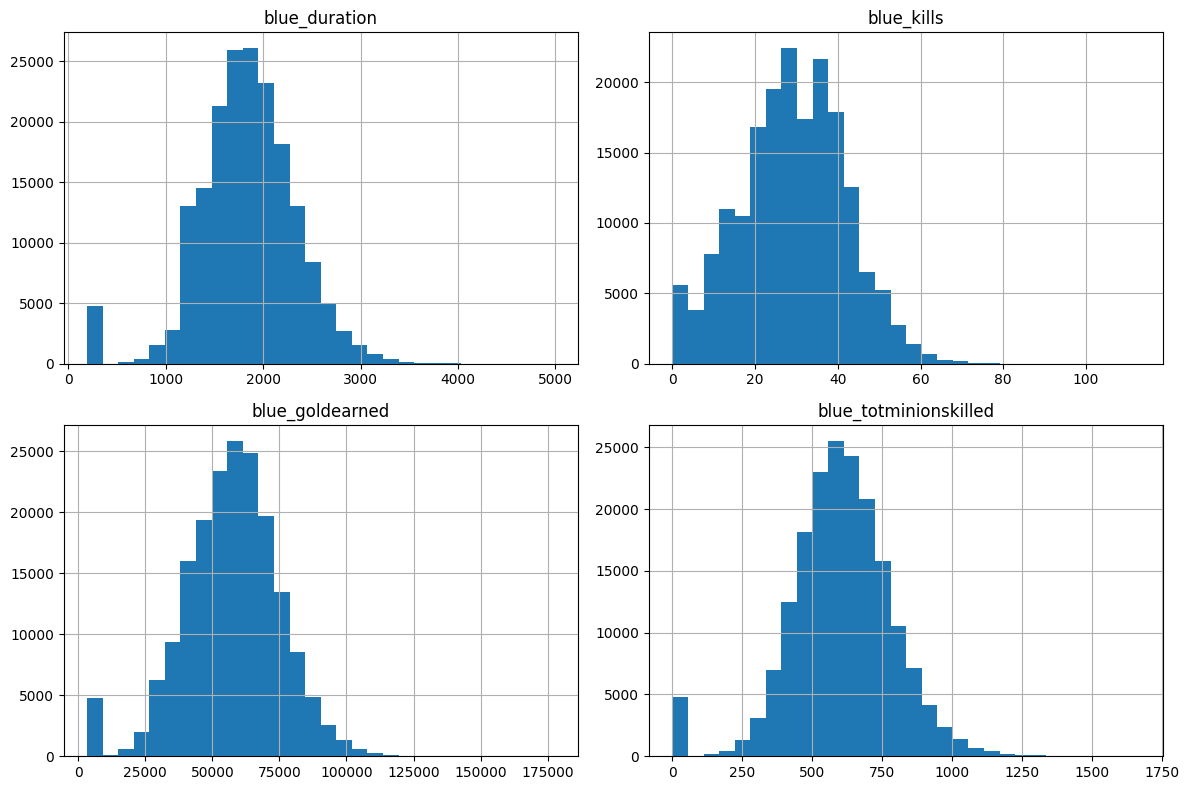

In [64]:
continuous_vars = ['blue_duration', 'blue_kills', 'blue_goldearned', 'blue_totminionskilled']

df[continuous_vars].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Anàlisi de les variables contínues (duració, kills, or i minions)

Ara analitzem un altre tipus de variables: les **variables contínues**, que poden prendre molts valors diferents i que descriuen el ritme i la intensitat d’una partida.  
En aquest cas, ens fixem en quatre mesures bàsiques del desenvolupament del joc:

- `blue_duration`: quant ha durat la partida.
- `blue_kills`: quantes baixes ha aconseguit l’equip blau.
- `blue_goldearned`: quina quantitat total d’or ha acumulat.
- `blue_totminionskilled`: quants minions ha eliminat.

A les gràfiques s’observen patrons molt clars:

- Com més llarga és una partida, **més kills** hi acostuma a haver.  
- Si hi ha més kills i més temps de joc, també augmenta **l’or guanyat**.  
- Els minions apareixen constantment, així que en partides llargues també n’hi ha més disponibles per eliminar.

També es detecta un detall important:  
hi ha un grup de partides **molt curtes**, al voltant dels 3 minuts.  
Aquestes partides tan breus són casos especials en què un jugador abandona i l’equip decideix **rendirse immediatament** per no perdre el temps.  
Això explica els valors molt baixos en kills, or i minions associats a aquestes partides.

Encara que aquestes variables siguin contínues, són molt útils perquè:

- descriuen el flux natural d’una partida,
- mostren forta relació entre elles,
- i ajuden a identificar comportaments anòmals.

Més endavant veurem com aquestes tendències es relacionen amb el resultat final (`winner`) i com poden ajudar-nos a construir el model de predicció.

### Variables Discretes

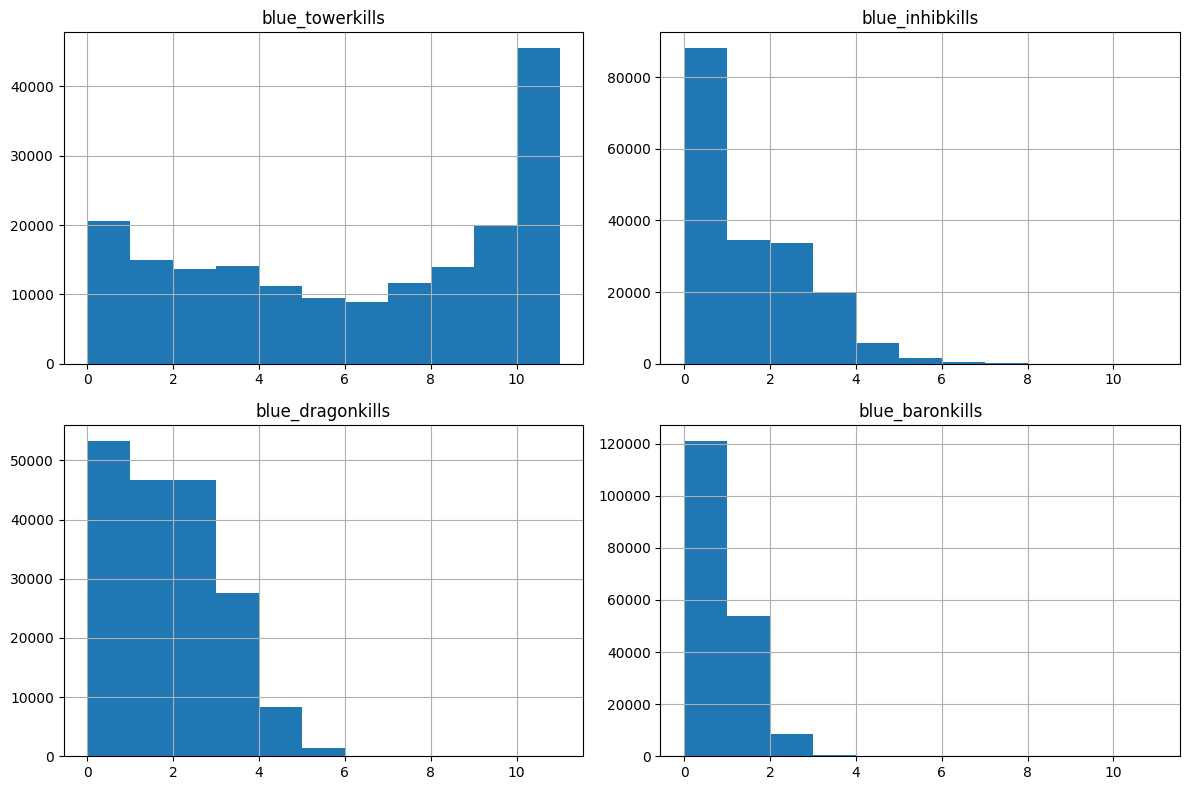

In [65]:
discrete_vars = ['blue_towerkills', 'blue_inhibkills', 'blue_dragonkills', 'blue_baronkills']

df[discrete_vars].hist(figsize=(12, 8), bins=range(0, 12))
plt.tight_layout()
plt.show()

### Anàlisi de les variables discretes (objectius)

Ara mirem un altre tipus de variables: els **objectius** que aconsegueix l’equip blau durant la partida.  
Són comptadors, és a dir, només poden tenir **nombres enters petits** (0, 1, 2, 3...).

Les quatre variables que hem representat són:

- `blue_towerkills`: quantes torres enemigues ha destruït l’equip blau.
- `blue_inhibkills`: quants inhibidors ha destruït.
- `blue_dragonkills`: quants dracs ha matat.
- `blue_baronkills`: quants barons ha matat.

A les gràfiques es veu clar que:

- La majoria de partides tenen **pocs objectius** (per exemple, 0 o 1 baró, 0–3 dracs).  
- Només en unes quantes partides l’equip blau aconsegueix molts objectius.

Té sentit: barons i dracs són enemics forts que no apareixen sovint, i no totes les partides duren prou o estan prou igualades com perquè es facin molts.

Encara que aquestes variables siguin discretes, són molt importants perquè:
- com més objectius aconsegueix un equip,
- més avantatge té,
- i per tant, és més probable que acabi guanyant la partida.

Més endavant veurem com aquests comptadors d’objectius es relacionen amb la variable `winner`.

### Variables binàries

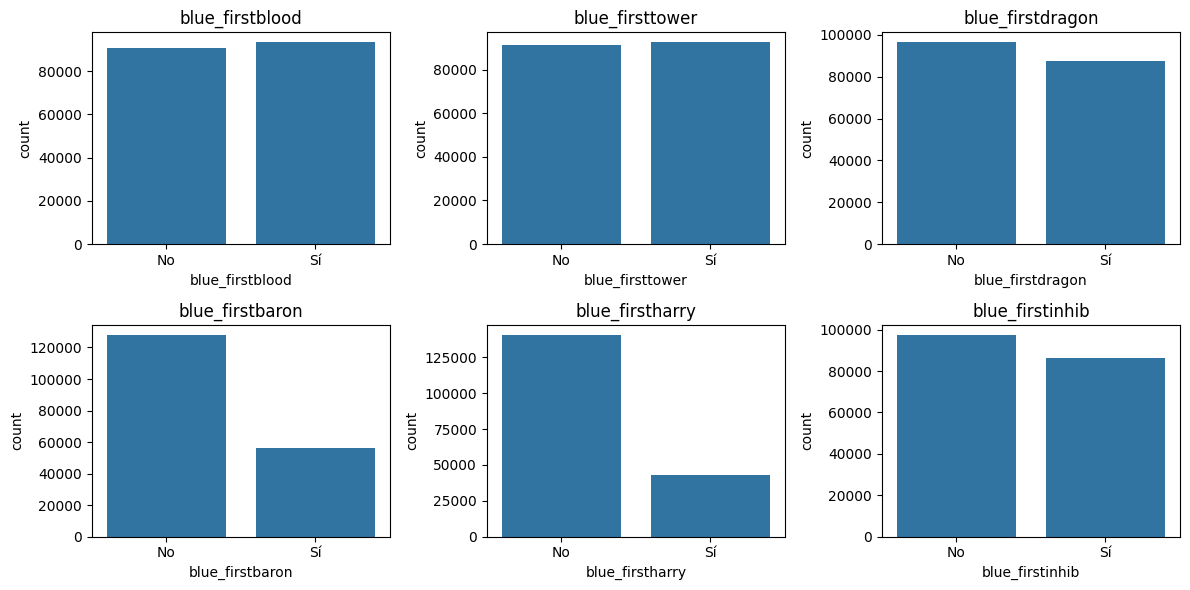

In [66]:
binary_vars = [
    'blue_firstblood', 'blue_firsttower', 'blue_firstdragon',
    'blue_firstbaron', 'blue_firstharry', 'blue_firstinhib'
]

fig, ax = plt.subplots(2, 3, figsize=(12, 6))
ax = ax.flatten()

for i, col in enumerate(binary_vars):
    sns.countplot(x=df[col], ax=ax[i])
    ax[i].set_title(col)
    ax[i].set_xticklabels(['No', 'Sí'])

plt.tight_layout()
plt.show()

### Anàlisi de les variables binàries (primers objectius)

Ara analitzem un altre grup de variables molt importants: les **variables binàries**, que només poden tenir dos valors possibles (0 o 1).  
Aquestes variables indiquen si l’equip blau ha estat **el primer** en aconseguir un objectiu determinat de la partida.

Les variables que hem representat són:

- `blue_firstblood`: si l’equip blau ha fet la primera baixa.
- `blue_firsttower`: si ha destruït la primera torre.
- `blue_firstdragon`: si ha matat el primer drac.
- `blue_firstbaron`: si ha matat el primer baró.
- `blue_firstharry`: si ha matat el primer Herald.
- `blue_firstinhib`: si ha destruït el primer inhibidor.

Aquestes variables són molt simples:  
- **1** significa que l’equip blau ha estat el primer a obtenir l’objectiu.  
- **0** significa que no ho ha estat (per tant, ho ha fet l’equip vermell).

Quan observem les gràfiques, veiem que en molts casos els valors 0 i 1 estan relativament equilibrats, cosa que indica que **qualsevol equip pot aconseguir aquests primers objectius**.

A més, aquests primers esdeveniments tenen sovint un impacte directe en el desenvolupament del partit. Per exemple:

- Fer la **primera baixa** pot donar avantatge inicial.
- Enderrocar la **primera torre** dona més control del mapa.
- Matar el **primer drac** o el **primer baró** pot donar estadístiques extra.
- Destruir el **primer inhibidor** pot crear pressió constant amb minions més forts.

Encara que aquestes variables només indiquin si un equip ho ha fet “primer”, són molt útils perquè:
- representen moments clau del joc,
- solen coincidir amb equips que van per davant,
- i sovint tenen relació amb la probabilitat de victòria.

Més endavant veurem com aquestes accions inicials s’associen amb `winner` i fins a quin punt influeixen en el resultat final.

### Variables de composició

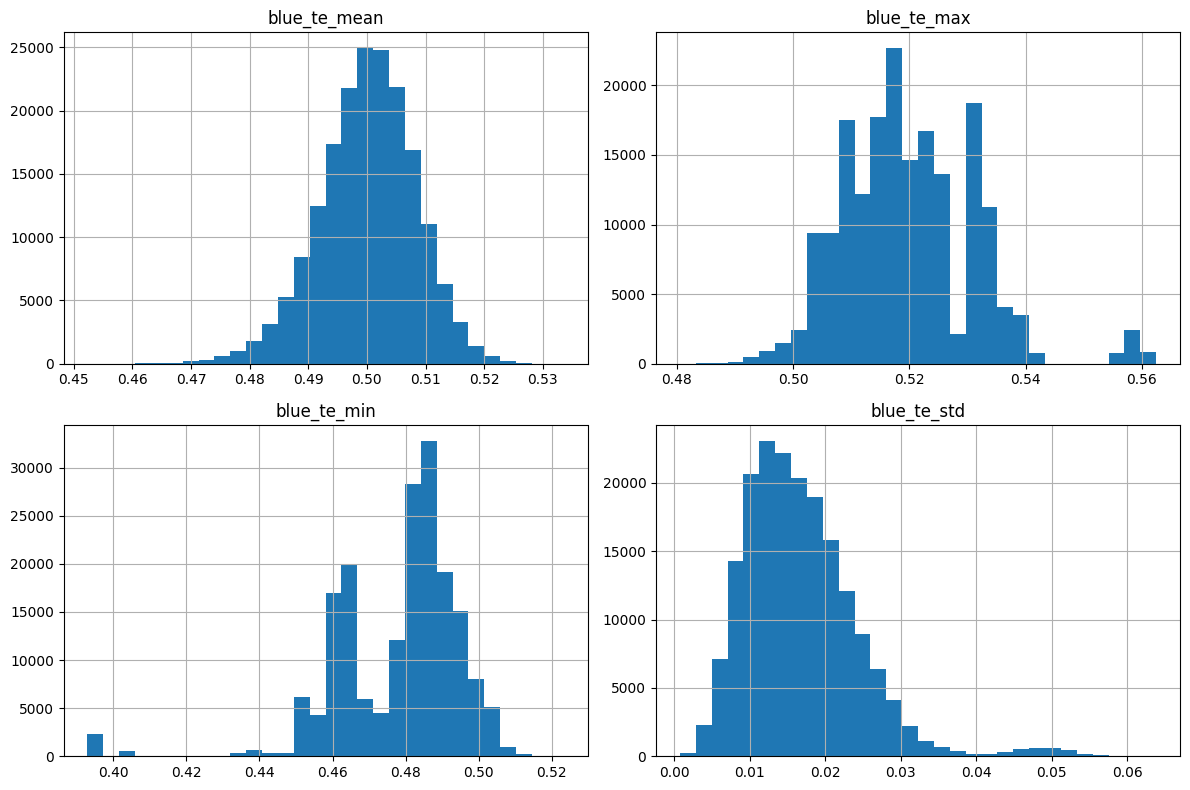

In [67]:
composition_vars = ['blue_te_mean', 'blue_te_max', 'blue_te_min', 'blue_te_std']

df[composition_vars].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Anàlisi de les variables de composició dels campions (Target Encoding)

Aquestes variables descriuen la **força històrica** dels campions que utilitza cada equip.  
Com que cada partida té cinc campions per equip i no volem crear centenars de columnes (una per campió), utilitzem una tècnica anomenada **target encoding**, que converteix cada campió en un valor numèric que representa la seva eficàcia històrica.

Les variables de composició són:

- `te_mean`: força mitjana dels 5 campions de l’equip  
- `te_max`: campió més fort de l’equip  
- `te_min`: campió menys eficient  
- `te_std`: variabilitat entre els 5 campions (si tots són forts o alguns molt dèbils)

Observant les gràfiques, veiem que:

- Tant l’equip blau com el vermell tenen distribucions molt semblants, cosa que indica **equilibri** entre equips.
- Els valors són relativament compactes (entre 0.4 i 0.65 aproximadament), ja que els winrates de campions acostumen a estar acotats.
- Hi ha equips amb composicions molt homogènies (`te_std` baix) i d’altres amb combinacions més extremes (`te_std` alt).

Aquestes variables ens ajuden a capturar la idea que **algunes composicions d’equip tenen més probabilitat de guanyar** que altres.

### Variables de les diferències entre equips

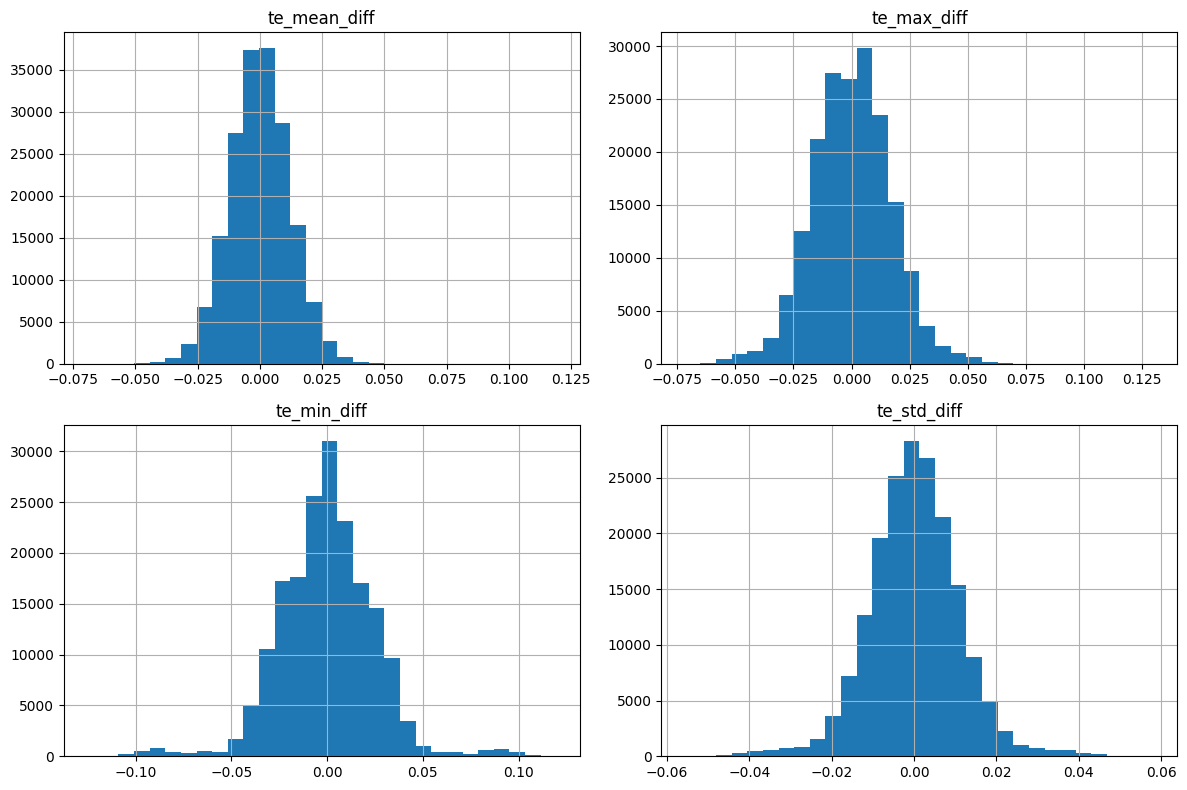

In [68]:
diff_vars = ['te_mean_diff', 'te_max_diff', 'te_min_diff', 'te_std_diff']

df[diff_vars].hist(figsize=(12, 8), bins=30)
plt.tight_layout()
plt.show()

### Anàlisi de les diferències entre equips

A més d’avaluar la composició de cada equip per separat, també podem calcular la **diferència directa entre l’equip blau i el vermell**.  
Això ens permet saber quin equip parteix amb una composició “més forta” segons els seus campions.

Les variables de diferència són:

- `te_mean_diff`: diferència entre la força mitjana del blau i la del vermell  
- `te_max_diff`: diferència entre els campions més forts  
- `te_min_diff`: diferència entre els més dèbils  
- `te_std_diff`: diferència en variabilitat de composició

Si aquestes diferències són positives, l’equip blau té (en teoria) campions més forts.  
Si són negatives, passa el contrari.

Les gràfiques mostren:

- Distribucions centrades molt a prop del **0**, cosa que indica que moltes partides tenen composicions equilibrades.
- Alguns casos on un equip té una composició clarament més forta que l’altre.

Aquestes diferències són especialment útils pel model perquè ens indiquen **quin equip té avantatge abans que comenci la partida**.

### Variables de comparació directa entre equips


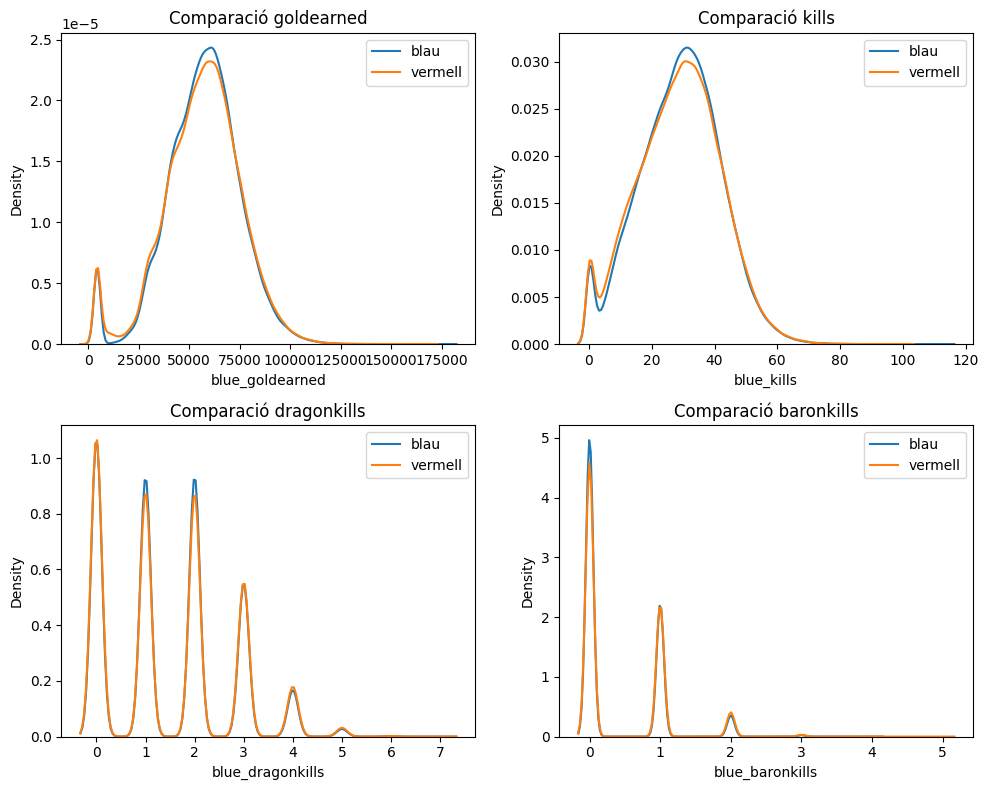

In [69]:
comparison_vars = ['blue_goldearned', 'red_goldearned', 'blue_kills', 'red_kills']

fig, ax = plt.subplots(2, 2, figsize=(10, 8))
ax = ax.flatten()

pairs = [
    ('blue_goldearned', 'red_goldearned'),
    ('blue_kills', 'red_kills'),
    ('blue_dragonkills', 'red_dragonkills'),
    ('blue_baronkills', 'red_baronkills')
]

for i, (b, r) in enumerate(pairs):
    sns.kdeplot(df[b], ax=ax[i], label='blau')
    sns.kdeplot(df[r], ax=ax[i], label='vermell')
    ax[i].set_title(f"Comparació {b.split('_')[1]}")
    ax[i].legend()

plt.tight_layout()
plt.show()


### Comparació directa entre equips

Per entendre millor si els equips estan equilibrats, podem comparar directament algunes de les estadístiques més importants entre l’equip blau i el vermell:

- `goldearned`: or total generat
- `kills`: baixes aconseguides
- `dragonkills`: dracs derrotats
- `baronkills`: barons eliminats

A través de les gràfiques veiem que:

- Les distribucions del blau i del vermell són molt semblants, cosa que mostra que el joc és equilibrat.
- No hi ha un equip que tingui sistemàticament més or, més kills o més objectius.
- Les diferències reals entre equips provenen del rendiment a cada partida, no d’un avantatge inherent.

Aquest tipus de comparació ajuda a confirmar que l’etiqueta `winner` no depèn del color de l’equip, sinó de les accions i objectius aconseguits durant el joc.

## 5.2. Un nou aspecte a tenir en compte a la predicció

En League of Legends, no tots els campions tenen el mateix impacte al llarg d’una partida.  
N'hi ha que destaquen molt a l’**early game** (Renekton, Elise), mentre que d’altres són clarament **campions de late game** (Kayle, Kassadin, Vayne).

Fins ara disposàvem de:

- estadístiques finals de cada partida,
- informació agregada d’equip,
- target encodings globals per campió,
- la variable objectiu `winner`.

Tot i això, **no teníem en compte l’escala temporal**: com es comporta un campió quan la partida és curta, mitjana o llarga.

En aquesta secció afegirem una nova dimensió al dataset:

- determinar la fase real de cada partida segons la seva duració,
- estimar la força de cada campió en cada fase,
- agregar aquesta informació a nivell d’equip,
- i aplicar un multiplicador perquè les composicions fortes en late tinguin més importància quan la partida realment arriba a late.


### Definició de les fases del joc

Per capturar correctament el comportament dels campions segons el moment de la partida, dividim la duració en tres fases clàssiques:

- **Early:** de 0 a 15 minuts  
- **Mid:** de 15 a 30 minuts  
- **Late:** més de 30 minuts  

La columna `duration` del fitxer `matches.csv` està en segons, així que només cal convertir els intervals.


In [70]:
matches = pd.read_csv("../data/matches.csv")

matches['game_phase'] = pd.cut(
    matches['duration'],
    bins=[0, 15*60, 30*60, np.inf],
    labels=['early', 'mid', 'late'],
    include_lowest=True
)

matches[['id','duration','game_phase']].head()


,id,duration,game_phase
0,10,1909,late
1,11,1693,mid
2,12,1482,mid
3,13,1954,late
4,14,2067,late


### Construcció d’un dataset a nivell jugador

Per poder mesurar la força d’un campió en cada fase, necessitem una taula on cada fila representi:

- un jugador,
- el campió que utilitza,
- la fase de la partida,
- i si guanya o perd.

Això ho obtindrem unint:
- `participants.csv` (jugadors i campions),
- `matches.csv` (duració i fase),
- `lol_final.csv` (resultat de la partida).

In [71]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold

# df ya existe y es tu lol_final limpiado de nulos
# Cargamos los otros datasets que necesitamos
participants = pd.read_csv("../data/participants.csv")
matches = pd.read_csv("../data/matches.csv")

# =============================
# 1. Mapear winner por partida (matchid)
# =============================

# En df, cada fila es una partida y blue_matchid es el id de partida
winner_by_match = df.set_index("blue_matchid")["winner"]

# Añadimos el resultado de la partida a participants
part = participants.merge(
    winner_by_match.rename("winner_match"),
    left_on="matchid",
    right_index=True,
    how="inner"   # nos quedamos solo con los matches que están en df
)

# =============================
# 2. Añadir duración y fase (early/mid/late)
# =============================

# matches: id = matchid, duration en segundos
part = part.merge(
    matches[["id", "duration"]].rename(columns={"id": "matchid"}),
    on="matchid",
    how="left"
)

part["phase"] = pd.cut(
    part["duration"],
    bins=[0, 15*60, 30*60, np.inf],
    labels=["early", "mid", "late"],
    include_lowest=True
)

# =============================
# 3. Determinar equipo (blue/red) y si ha ganado ese jugador
# =============================

part["team"] = np.where(part["player"] <= 5, "blue", "red")

part["won"] = (
    ((part["team"] == "blue") & (part["winner_match"] == 1)) |
    ((part["team"] == "red") & (part["winner_match"] == 0))
).astype(int)

# =============================
# 4. Target Encoding OOF por (championid, phase)
# =============================

kf = KFold(n_splits=5, shuffle=True, random_state=42)
match_ids = part["matchid"].unique()

matchid_to_fold = {}
for fold, (_, val_idx) in enumerate(kf.split(match_ids)):
    for mid in match_ids[val_idx]:
        matchid_to_fold[mid] = fold

part["fold"] = part["matchid"].map(matchid_to_fold)

global_prior = part["won"].mean()
oof_te = np.zeros(len(part))

for fold in range(5):
    train = part[part["fold"] != fold]
    val   = part[part["fold"] == fold]

    stats = (train
             .groupby(["championid", "phase"])["won"]
             .agg(["mean", "count"]))

    m = 50  # suavizado
    stats["te"] = (stats["mean"] * stats["count"] + global_prior * m) / (stats["count"] + m)
    mapping = stats["te"].to_dict()

    val_idx = val.index
    oof_te[val_idx] = [
        mapping.get((cid, phase), global_prior)
        for cid, phase in zip(val["championid"], val["phase"])
    ]

part["champ_phase_te"] = oof_te

# =============================
# 5. Agregar a nivel equipo (matchid, team)
# =============================

team_agg = (part
            .groupby(["matchid", "team"])["champ_phase_te"]
            .agg(["mean", "std", "min", "max"])
            .reset_index())

team_agg_pivot = team_agg.pivot(index="matchid", columns="team")

team_agg_pivot.columns = [
    f"phase_te_{stat}_{team}"
    for stat, team in team_agg_pivot.columns
]

team_agg_pivot = team_agg_pivot.reset_index()

# =============================
# 6. Unir estas features a df usando blue_matchid
# =============================

df = df.merge(
    team_agg_pivot,
    left_on="blue_matchid",
    right_on="matchid",
    how="left"
)

df = df.drop(columns=["matchid"])

# =============================
# 7. Crear diferencias blue - red
# =============================

df["phase_te_mean_diff"] = df["phase_te_mean_blue"] - df["phase_te_mean_red"]
df["phase_te_std_diff"]  = df["phase_te_std_blue"]  - df["phase_te_std_red"]
df["phase_te_min_diff"]  = df["phase_te_min_blue"]  - df["phase_te_min_red"]
df["phase_te_max_diff"]  = df["phase_te_max_blue"]  - df["phase_te_max_red"]

# =============================
# 8. Crear late_multiplier y versiones ponderadas
# =============================

# Usamos blue_duration de df (duración de la partida en segundos)
df["late_multiplier"] = np.where(
    df["blue_duration"] > 30*60, 1.25,
    np.where(df["blue_duration"] > 15*60, 1.15, 1.00)
)

df["phase_te_mean_blue_weighted"] = df["phase_te_mean_blue"] * df["late_multiplier"]
df["phase_te_mean_red_weighted"]  = df["phase_te_mean_red"]  * df["late_multiplier"]
df["phase_te_mean_diff_weighted"] = (
    df["phase_te_mean_blue_weighted"] - df["phase_te_mean_red_weighted"]
)

# =============================
# 9. Comprobar que todo está bien creado
# =============================

[df_col for df_col in df.columns if "phase_te" in df_col or "late_multiplier" in df_col], df.filter(like="phase_te_mean").head()


(['phase_te_mean_blue',
  'phase_te_mean_red',
  'phase_te_std_blue',
  'phase_te_std_red',
  'phase_te_min_blue',
  'phase_te_min_red',
  'phase_te_max_blue',
  'phase_te_max_red',
  'phase_te_mean_diff',
  'phase_te_std_diff',
  'phase_te_min_diff',
  'phase_te_max_diff',
  'late_multiplier',
  'phase_te_mean_blue_weighted',
  'phase_te_mean_red_weighted',
  'phase_te_mean_diff_weighted'],
    phase_te_mean_blue  phase_te_mean_red  phase_te_mean_diff  \
 0            0.502355           0.518163           -0.015808   
 1            0.494268           0.502904           -0.008635   
 2            0.501651           0.510499           -0.008848   
 3            0.483406           0.495377           -0.011972   
 4            0.502136           0.497528            0.004607   
 
    phase_te_mean_blue_weighted  phase_te_mean_red_weighted  \
 0                     0.627944                    0.647704   
 1                     0.568409                    0.578339   
 2                     0

### Target Encoding segons la fase de la partida

Calculem, per a cada campió, la seva probabilitat de victòria en funció de la fase:

- winrate en partides **early**
- winrate en partides **mid**
- winrate en partides **late**

Fem servir un esquema **OOF (Out Of Fold)** per evitar fuga d’informació:  
cada partida s’avalua amb estadístiques calculades sense utilitzar ella mateixa.

El resultat és una columna `champ_phase_te` que reflecteix la força del campió en la fase actual de la partida.

In [74]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
match_ids = part['matchid'].unique()

matchid_to_fold = {}
for fold, (_, val_idx) in enumerate(kf.split(match_ids)):
    for mid in match_ids[val_idx]:
        matchid_to_fold[mid] = fold

part['fold'] = part['matchid'].map(matchid_to_fold)

# Prior global
global_prior = part['won'].mean()
oof_te = np.zeros(len(part))

for fold in range(5):
    train = part[part['fold'] != fold]
    val   = part[part['fold'] == fold]

    stats = (train
             .groupby(['championid','phase'])['won']   # <--- aquí 'phase'
             .agg(['mean','count']))

    m = 50  # suavitzat
    stats['te'] = (stats['mean'] * stats['count'] + global_prior * m) / (stats['count'] + m)
    mapping = stats['te'].to_dict()

    val_idx = val.index
    oof_te[val_idx] = [
        mapping.get((cid, ph), global_prior)          # <--- aquí 'ph'
        for cid, ph in zip(val['championid'], val['phase'])  # <--- aquí 'phase'
    ]

part['champ_phase_te'] = oof_te

part[['matchid','player','championid','phase','champ_phase_te']].head()


,matchid,player,championid,phase,champ_phase_te
0,10,1,19,late,0.521188
1,10,2,267,late,0.500893
2,10,3,119,late,0.500686
3,10,4,114,late,0.503917
4,10,5,112,late,0.485093


### Agregació de la força per equip

Un equip està compost per 5 campions.  
Agreguem la força dels campions (`champ_phase_te`) per obtenir mètriques a nivell d’equip:

- mitjana,
- màxim,
- mínim,
- desviació estàndard,

i també la diferència entre equips.

In [75]:
team_agg = (part
            .groupby(['matchid','team'])['champ_phase_te']
            .agg(['mean','std','min','max'])
            .reset_index())

team_agg_pivot = team_agg.pivot(index='matchid', columns='team')
team_agg_pivot.columns = [
    f"phase_te_{stat}_{team}"
    for stat, team in team_agg_pivot.columns
]

team_agg_pivot['phase_te_mean_diff'] = (
    team_agg_pivot['phase_te_mean_blue'] - team_agg_pivot['phase_te_mean_red']
)

team_agg_pivot.head()


,phase_te_mean_blue,phase_te_mean_red,phase_te_std_blue,phase_te_std_red,phase_te_min_blue,phase_te_min_red,phase_te_max_blue,phase_te_max_red,phase_te_mean_diff
matchid,,,,,,,,,
10,0.502355,0.518163,0.012845,0.027846,0.485093,0.497093,0.521188,0.564414,-0.015808
11,0.494268,0.502904,0.028649,0.016476,0.459908,0.479855,0.535347,0.524030,-0.008635
12,0.501651,0.510499,0.036383,0.022023,0.447069,0.495010,0.543570,0.548038,-0.008848
13,0.483406,0.495377,0.022287,0.016135,0.462903,0.474848,0.514841,0.519047,-0.011972
14,0.502136,0.497528,0.008823,0.013617,0.494188,0.481774,0.514844,0.512880,0.004607


### Aplicació d’un multiplicador segons la duració de la partida

Els campions forts en **late** no haurien de tenir el mateix pes en una partida curta que en una partida llarga.

Per això apliquem un multiplicador:

- Partides **early** → × 1.00  
- Partides **mid** → × 1.15  
- Partides **late** → × 1.25  

Així, reforcem la importància real de les composicions de late scaling quan la partida arriba a aquesta fase.

In [76]:
import numpy as np

# df todavía tiene 'blue_duration', 'phase_te_mean_blue' y 'phase_te_mean_red'
df['late_multiplier'] = np.where(df['blue_duration'] > 30*60, 1.25,
                           np.where(df['blue_duration'] > 15*60, 1.15, 1.00))
[x for x in df.columns if 'phase_te_mean' in x or 'duration' in x]

df['phase_te_mean_blue_weighted'] = df['phase_te_mean_blue'] * df['late_multiplier']
df['phase_te_mean_red_weighted']  = df['phase_te_mean_red']  * df['late_multiplier']
df['phase_te_mean_diff_weighted'] = df['phase_te_mean_blue_weighted'] - df['phase_te_mean_red_weighted']

df.filter(like="weighted").head()


,phase_te_mean_blue_weighted,phase_te_mean_red_weighted,phase_te_mean_diff_weighted
0,0.627944,0.647704,-0.019760
1,0.568409,0.578339,-0.009931
2,0.576899,0.587074,-0.010175
3,0.604257,0.619222,-0.014965
4,0.627670,0.621910,0.005759


### Conclusió

Hem afegit una nova dimensió al dataset: la força dels campions condicionada a la fase real de la partida.  
Aquest procés inclou:

- identificar la fase segons la duració,
- calcular la força de cada campió segons fase,
- agregar-la a nivell d’equip,
- i ajustar-la amb un multiplicador que reflecteix la importància del late game.

Aquesta informació és molt valuosa per al model predictiu, ja que captura fenòmens estratègics com el scaling, la composició i l’evolució temporal del joc.

## 5.3. Correlació amb `winner`

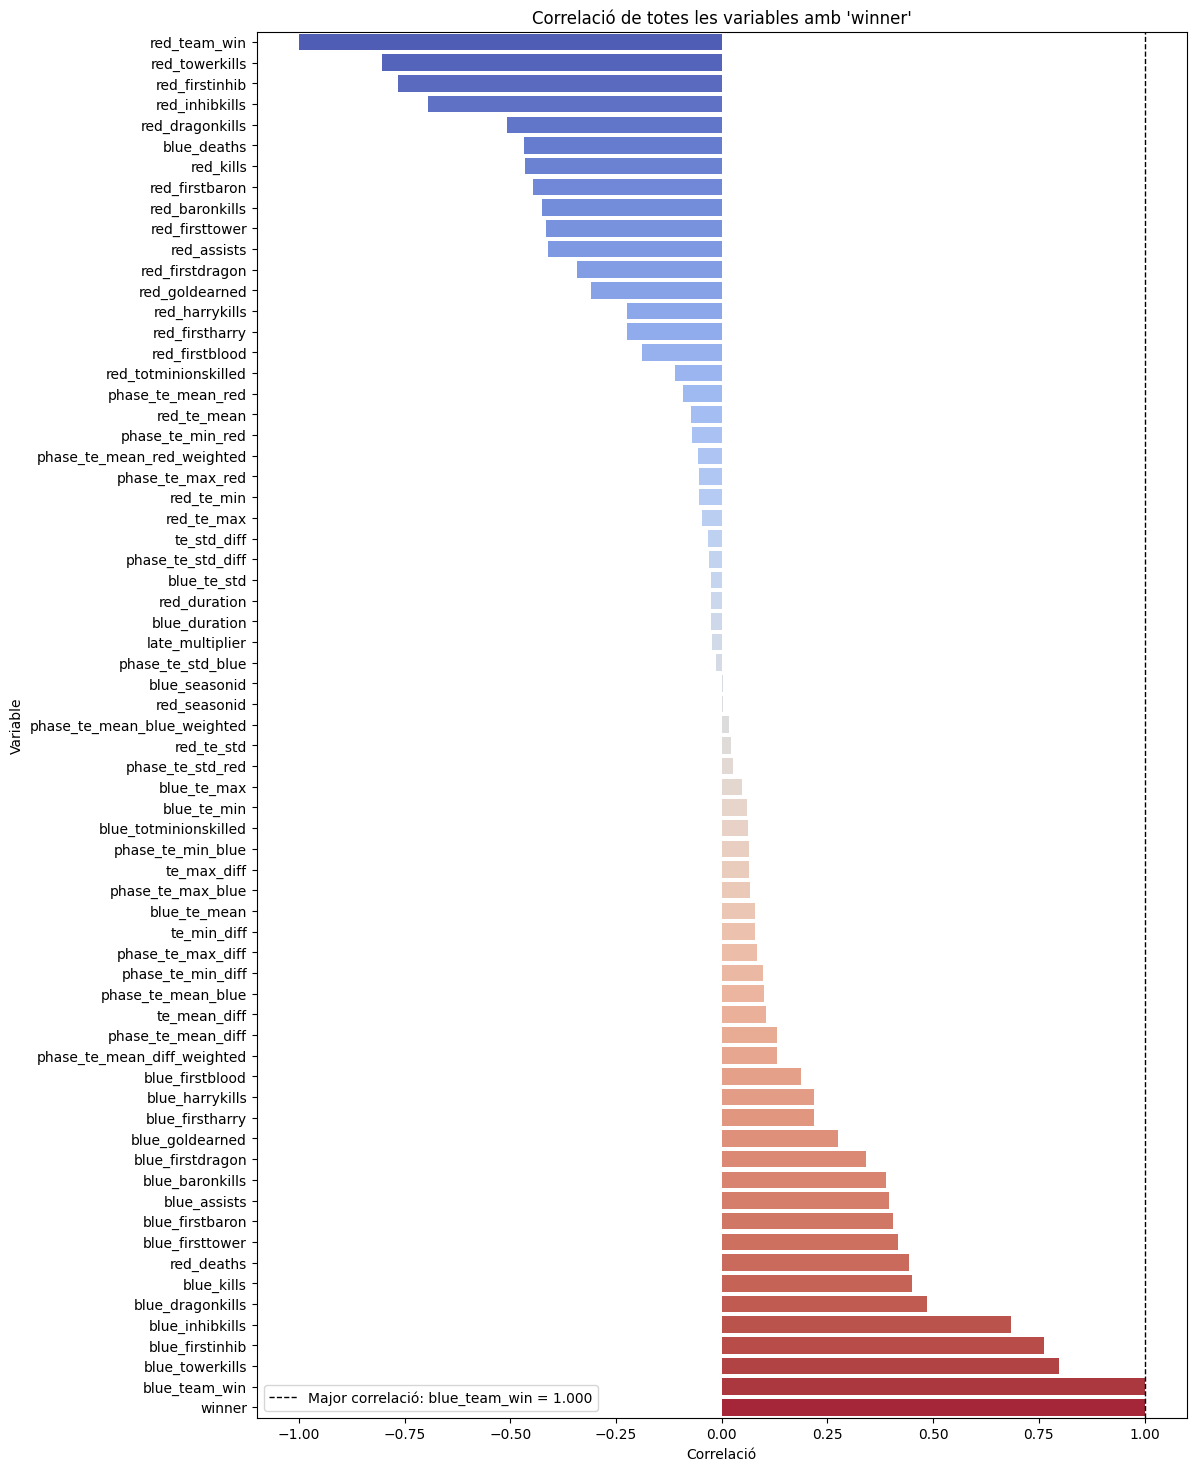

In [77]:
num_cols = df.select_dtypes(include=[np.number]).columns

cols_to_drop = [
    'blue_matchid', 'red_matchid',
    'blue_gameid',
    'blue_teamid_x', 'blue_teamid_y',
    'red_teamid_x', 'red_teamid_y'
]

cols_to_drop = [c for c in cols_to_drop if c in num_cols]

use_cols = [c for c in num_cols if c not in cols_to_drop]

corr_with_winner = df[use_cols].corr(numeric_only=True)['winner'].sort_values()

top_n = 5
top_features = corr_with_winner.abs().sort_values(ascending=False).head(top_n).index

colors = [
    'tab:red' if col in top_features else 'lightgrey'
    for col in corr_with_winner.index
]

# 6) Fem la gràfica
plt.figure(figsize=(12, 18))
sns.barplot(
    x=corr_with_winner.values,
    y=corr_with_winner.index,
    palette=colors
)

# Gràfica amb totes les variables
sns.barplot(
    x=corr_with_winner.values,
    y=corr_with_winner.index,
    palette=sns.color_palette("coolwarm", len(corr_with_winner))
)

plt.title("Correlació de totes les variables amb 'winner'")
plt.xlabel("Correlació")
plt.ylabel("Variable")

# Destaquem la variable més correlacionada
max_var = corr_with_winner.idxmax()
max_val = corr_with_winner.max()

plt.axvline(
    x=max_val,
    color="black",
    linestyle="--",
    linewidth=1,
    label=f"Major correlació: {max_var} = {max_val:.3f}"
)
plt.legend()

plt.show()

### Conclusions de la correlació de les variables amb `winner`

En aquest gràfic hem representat la correlació de totes les variables numèriques amb la variable objectiu `winner`, que indica si guanya l’equip blau.  
Per interpretar correctament el resultat, hem ignorat les variables que ja contenen directament la informació del guanyador (com `blue_team_win`, `red_team_win` o la mateixa `winner`), ja que donarien una visió enganyosa.

L’anàlisi es pot dividir en quatre blocs principals.

#### 1. Estadístiques de l’equip blau (correlació positiva)

Les variables que mostren una correlació positiva amb `winner` són aquelles que descriuen un bon rendiment de l’equip blau. Com més alta és la seva correlació, més probable és que l’equip blau guanyi quan aquestes estadístiques són elevades.

Entre les variables més relacionades amb la victòria hi ha:

- Nombre de torres destruïdes (`blue_towerkills`)
- Nombre d’inhibidors destruïts (`blue_inhibkills`)
- Nombre de dracs, barons o heralds aconseguits
- Kills, assistències i or aconseguit
- Primera torre, primer drac, primera sang, etc.

Això indica que els objectius importants i el rendiment econòmic i de combat de l’equip blau són factors clau per explicar el resultat final.

#### 2. Estadístiques de l’equip vermell (correlació negativa)

Les variables equivalents però de l’equip vermell mostren correlacions negatives.  
Això és coherent, perquè un valor alt en aquestes estadístiques significa que l’equip vermell ha jugat millor i, per tant, és menys probable que guanyi l’equip blau (que és el que mesura `winner`).

Les variables més destacades són:

- Torres destruïdes pel vermell (`red_towerkills`)
- Inhibidors destruïts (`red_inhibkills`)
- Objectius majors aconseguits (`red_dragonkills`, `red_baronkills`, etc.)
- Kills, assistències i or aconseguit pel vermell
- Primeres accions com primera torre o primer drac

Aquest patró simètric confirma que el dataset és coherent i que les mètriques d’un equip s’oposen a les de l’altre en relació amb el resultat.

#### 3. Variables de composició de campions (`te_*` i `phase_te_*`)

Aquestes variables mesuren la "força teòrica" de la composició de campions d’un equip, calculada a partir del rendiment històric dels campions en moltes partides.  
Mostren una correlació moderada amb el resultat, inferior a la dels objectius dins la partida.

Això té una explicació lògica: la composició de campions pot donar avantatge, però no garanteix el resultat. El que passa dins la partida (objectius, or i combat) té un pes molt més gran.

Tot i així, aquestes variables aporten informació útil, ja que capturen la capacitat potencial dels equips.

#### 4. Variables relacionades amb la fase del joc i el late game

Les noves variables introduïdes en aquest apartat, com:

- `phase_te_mean_blue`
- `phase_te_mean_red`
- `phase_te_mean_diff`
- `phase_te_mean_blue_weighted`
- `phase_te_mean_red_weighted`
- `late_multiplier`

tenen correlacions més baixes, però aporten informació addicional sobre com els equips estan preparats per partides llargues o curtes.

Aquestes variables reflecteixen:

- si els campions d’un equip són especialment forts en partides llargues (late game),
- o si depenen més de fases inicials.

La correlació és més baixa perquè la influència del late game només és rellevant en partides que realment arriben a aquesta fase. Tot i això, aquestes variables són importants per al model perquè aporten un matís estratègic que no queda reflectit en les estadístiques bàsiques.

#### Resum general

Les variables amb més correlació amb la victòria són les que descriuen el rendiment real dels equips: objectius aconseguits, kills, economia i control del mapa.

Les variables de composició aporten informació addicional i moderada, i les variables noves relacionades amb la fase del joc afegeixen un nivell extra de comprensió sobre la força potencial de cada equip, especialment en partides llargues.

Aquesta combinació de variables ofereix una visió completa i equilibrada:
- el que un equip fa dins la partida,
- el potencial de la seva composició,
- i com aquest potencial varia segons la duració del joc.

Tot plegat resulta molt útil per construir un model predictiu sòlid i realista.

## 5.4 Tractament i selecció de variables

En la gràfica de correlacions hem detectat que algunes variables tenen una correlació molt alta
amb `winner`. Algunes d’elles, com `blue_team_win` o `red_team_win`, ja contenen directament
la informació del guanyador. Si aquestes variables s’incloguessin en el model predictiu,
estaríem causant *fuita d’informació* (data leakage), és a dir, estaríem donant al model la
resposta abans de temps.

També hi ha variables que, tot i no ser tan explícites, estan tan relacionades amb el resultat
que fan que la predicció sigui gairebé trivial. Un exemple clar és:

- el nombre total de torres destruïdes per cada equip (`blue_towerkills`, `red_towerkills`)

En la majoria de partides, l’equip que destrueix més torres és el que acaba guanyant, de manera
que aquesta variable fa la predicció massa fàcil i no aporta informació útil per anticipar
el resultat abans que la partida estigui molt avançada.

En canvi, **no eliminarem** variables com:

- la primera torre (`blue_firsttower`, `red_firsttower`)
- les variables relacionades amb inhibidors i altres objectius puntuals

perquè poden donar lloc a escenaris de remuntada: partides on un equip va per darrere
però aconsegueix recuperar-se més endavant. Aquest tipus d’informació és valuosa
perquè capta més variabilitat estratègica.

A més, també descartarem variables que només són identificadors, com ID de partida
o ID d’equip, ja que no aporten informació predictiva.

Finalment, eliminarem també les variables que indiquen la **versió del joc**:

- `blue_version`
- `red_version`

Tot i que poden ser útils en altres tipus d’anàlisi, per predir qui guanyarà una partida
aquestes variables **no aporten cap informació directa**: conèixer la versió concreta
del parxe no dóna una pista clara o consistent sobre el resultat.

### Objectius d’aquesta secció

1. Identificar i eliminar les variables que generen fuita d’informació
   o que no aporten valor predictiu.
2. Calcular de nou la correlació amb `winner` només amb variables netes.
3. Visualitzar la nova correlació en forma de taula i gràfica.

### Variables que eliminarem

#### 1. Variables que codifiquen directament el resultat
- `blue_team_win`
- `red_team_win`

#### 2. Variables d'objectius massa deterministes (només torres totals)
- `blue_towerkills`
- `red_towerkills`

#### 3. Identificadors sense informació predictiva
- `blue_matchid`, `red_matchid`
- `blue_teamid_x`, `blue_teamid_y`
- `red_teamid_x`, `red_teamid_y`
- `blue_gameid`

#### 4. Variables de versió del joc (no aporten informació sobre el guanyador)
- `blue_version`
- `red_version`


In [78]:
import numpy as np

# Columnes que volem excloure explícitament de l'anàlisi
cols_a_excloure = [
    # resultat duplicat
    'blue_team_win', 'red_team_win',

    # objectius massa deterministes (només torres totals)
    'blue_towerkills', 'red_towerkills',

    # identificadors
    'blue_matchid', 'red_matchid',
    'blue_teamid_x', 'blue_teamid_y',
    'red_teamid_x', 'red_teamid_y',
    'blue_gameid',

    # versions del joc
    'blue_version', 'red_version'
]

# Ens quedem només amb les columnes numèriques
df_num = df.select_dtypes(include=[np.number])

# Calcular correlació només amb variables numèriques
correlacions = df_num.corr()['winner']

# Eliminar del resultat les columnes que no volem analitzar i també 'winner' (correlació 1.0 amb ella mateixa)
correlacions_netes = correlacions.drop(
    [col for col in cols_a_excloure if col in correlacions.index] + ['winner'],
    errors='ignore'
).sort_values(ascending=False)

correlacions_netes


blue_firstinhib     0.762752
blue_inhibkills     0.683710
blue_dragonkills    0.484533
blue_kills          0.450219
red_deaths          0.443719
                      ...   
red_kills          -0.464890
blue_deaths        -0.468369
red_dragonkills    -0.508556
red_inhibkills     -0.694396
red_firstinhib     -0.766294
Name: winner, Length: 62, dtype: float64

## 6. Data preparation

En aquest apartat preparem les dades per poder entrenar els models de classificació.
Crearem el dataset `df_model` que conté únicament les variables útils i sense fuita
d’informació, l’últim pas abans d’entrenar consisteix a separar les dades en:

- **Training set**: utilitzat per entrenar els models.  
- **Test set**: utilitzat per avaluar el rendiment sobre dades no vistes.

Fem la divisió mantenint la proporció original de classes (`stratify`).


### 6.1 Selecció final de variables explicatives

Un cop hem analitzat la correlació i hem eliminat totes les variables que generaven
*fuita d’informació* (és a dir, variables que ja revelaven el guanyador perquè formen
part del resultat final de la partida), ara podem seleccionar el conjunt definitiu
de variables que farem servir en el model predictiu.

L’objectiu d’aquesta selecció és construir un model **realista**, que sigui capaç de
predir el guanyador d’una partida sense dependre d’estadístiques que només coneixeríem
quan la partida ja està pràcticament decidida. Això vol dir que excloem:

- kills totals,
- dracs totals,
- barons totals,
- or final,
- minions finals,
- torres finals,
- inhibidors finals,
- duració total,
- i qualsevol resultat post-partida o indicador d’identitat.

Aquestes variables expliquen molt bé *per què* un equip ha guanyat, però **no serveixen
per predir**, perquè reflecteixen el que ja ha passat.

En canvi, mantenim variables que **sí que estan disponibles abans del resultat final** o
que formen part de la composició dels equips. Aquestes són molt útils per capturar:

- l’avantatge inicial,
- la pressió en els primers minuts,
- la força teòrica de la composició,
- i com afecta la duració de la partida a la força dels campions segons fase.

A continuació presentem les categories de variables seleccionades.

### 1. Variables de primeres accions  
Aquestes accions passen al principi i poden indicar quin equip ha començat dominant,
però no garanteixen la victòria. Són informatives però no deterministes.

- `blue_firstblood`, `red_firstblood`
- `blue_firsttower`, `red_firsttower`
- `blue_firstdragon`, `red_firstdragon`
- `blue_firstbaron`, `red_firstbaron`
- `blue_firstinhib`, `red_firstinhib`
- `blue_firstharry`, `red_firstharry`

### 2. Variables de composició d’equip (Target Encoding)  
Aquestes variables indiquen la força teòrica de la composició utilitzada per cada equip,
basada en dades històriques de moltes partides.

- `blue_te_mean`, `red_te_mean`
- `blue_te_max`, `blue_te_min`, `blue_te_std`
- `red_te_max`, `red_te_min`, `red_te_std`
- `te_mean_diff`, `te_max_diff`, `te_min_diff`, `te_std_diff`

### 3. Variables de força per fase (early/mid/late)  
Aquestes variables reflecteixen com de bons són els campions de cada equip segons la fase
de la partida. Ens permeten detectar, per exemple, composicions que són febles al principi
però molt fortes al late game.

- `phase_te_mean_blue`, `phase_te_mean_red`
- `phase_te_mean_diff`
- `phase_te_std_blue`, `phase_te_std_red`
- `phase_te_min_blue`, `phase_te_min_red`
- `phase_te_max_blue`, `phase_te_max_red`

### 4. Variables ponderades pel late game  
Aquesta és la millora més important del nostre dataset.  
Aquí ponderem la força de la composició amb relació a la duració de la partida:

- si la partida és curta → el late scaling importa menys  
- si la partida és llarga → el late scaling importa més  

Aquestes variables són resultats d’una transformació pròpia i controlada, no pas una dada
que causaria fuita d’informació.

- `phase_te_mean_blue_weighted`
- `phase_te_mean_red_weighted`
- `phase_te_mean_diff_weighted`
- `late_multiplier`


In [82]:
# ============== VARIABLES SELECCIONADES ==============
vars_model = [
    # primeres accions
    'blue_firstblood','red_firstblood',
    'blue_firsttower','red_firsttower',
    'blue_firstdragon','red_firstdragon',
    'blue_firstbaron','red_firstbaron',
    'blue_firstinhib','red_firstinhib',
    'blue_firstharry','red_firstharry',

    # composició d'equip
    'blue_te_mean','red_te_mean','te_mean_diff',
    'blue_te_max','blue_te_min','blue_te_std',
    'red_te_max','red_te_min','red_te_std',
    'te_max_diff','te_min_diff','te_std_diff',

    # força per fase
    'phase_te_mean_blue','phase_te_mean_red','phase_te_mean_diff',
    'phase_te_std_blue','phase_te_std_red',
    'phase_te_min_blue','phase_te_min_red',
    'phase_te_max_blue','phase_te_max_red',

    # ponderació pel late
    'phase_te_mean_blue_weighted','phase_te_mean_red_weighted',
    'phase_te_mean_diff_weighted','late_multiplier'
]

# ============== DATAFRAME FINAL PER AL MODEL ==============
df_model = df[vars_model + ['winner']].copy()

print("Forma final de df_model:", df_model.shape)
df_model.head()


Forma final de df_model: (184067, 38)


,blue_firstblood,red_firstblood,blue_firsttower,red_firsttower,blue_firstdragon,red_firstdragon,blue_firstbaron,red_firstbaron,blue_firstinhib,red_firstinhib,blue_firstharry,red_firstharry,blue_te_mean,red_te_mean,te_mean_diff,blue_te_max,blue_te_min,blue_te_std,red_te_max,red_te_min,red_te_std,te_max_diff,te_min_diff,te_std_diff,phase_te_mean_blue,phase_te_mean_red,phase_te_mean_diff,phase_te_std_blue,phase_te_std_red,phase_te_min_blue,phase_te_min_red,phase_te_max_blue,phase_te_max_red,phase_te_mean_blue_weighted,phase_te_mean_red_weighted,phase_te_mean_diff_weighted,late_multiplier,winner
0,0,1,1,0,0,1,0,1,0,1,0,1,0.507443,0.513354,-0.005911,0.524503,0.482524,0.017070,0.532189,0.492475,0.014869,-0.007686,-0.009951,0.002201,0.502355,0.518163,-0.015808,0.012845,0.027846,0.485093,0.497093,0.521188,0.564414,0.627944,0.647704,-0.019760,1.25,0
1,1,0,0,1,0,1,0,0,0,1,0,0,0.501231,0.504884,-0.003653,0.516650,0.481677,0.015323,0.519634,0.488710,0.011474,-0.002984,-0.007033,0.003849,0.494268,0.502904,-0.008635,0.028649,0.016476,0.459908,0.479855,0.535347,0.524030,0.568409,0.578339,-0.009931,1.15,0
2,1,0,0,1,0,1,0,0,0,1,0,0,0.513243,0.516069,-0.002826,0.529427,0.495772,0.015370,0.532041,0.505212,0.012012,-0.002614,-0.009441,0.003358,0.501651,0.510499,-0.008848,0.036383,0.022023,0.447069,0.495010,0.543570,0.548038,0.576899,0.587074,-0.010175,1.15,0
3,1,0,1,0,1,0,0,1,0,1,1,0,0.482963,0.487695,-0.004732,0.522779,0.459867,0.028191,0.517956,0.459533,0.021805,0.004823,0.000334,0.006386,0.483406,0.495377,-0.011972,0.022287,0.016135,0.462903,0.474848,0.514841,0.519047,0.604257,0.619222,-0.014965,1.25,0
4,1,0,0,1,0,1,0,1,0,1,1,0,0.495498,0.504733,-0.009235,0.510979,0.463535,0.018473,0.520145,0.483393,0.013803,-0.009167,-0.019858,0.004669,0.502136,0.497528,0.004607,0.008823,0.013617,0.494188,0.481774,0.514844,0.512880,0.627670,0.621910,0.005759,1.25,0


## 6.2. Divisió Train/Test

En aquest apartat preparem les dades per poder entrenar els models de classificació.
Com que el dataset `df_model` ja conté únicament les variables útils i sense fuita
d’informació, l’últim pas abans d’entrenar consisteix a separar les dades en:

- **Training set**: utilitzat per entrenar els models.  
- **Test set**: utilitzat per avaluar el rendiment sobre dades no vistes.

Fem la divisió mantenint la proporció original de classes (`stratify`).


In [84]:
from sklearn.model_selection import train_test_split

# X = variables explicatives
X = df_model.drop(columns=['winner'])

# y = variable objectiu
y = df_model['winner']

# Fem la divisió train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print("Mides del conjunt de dades:")
print(" - X_train:", X_train.shape)
print(" - X_test :", X_test.shape)
print(" - y_train:", y_train.shape)
print(" - y_test :", y_test.shape)

Mides del conjunt de dades:
 - X_train: (147253, 37)
 - X_test : (36814, 37)
 - y_train: (147253,)
 - y_test : (36814,)
